In [54]:
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
%matplotlib inline

import numpy as np
import seaborn as sns

import pickle

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler

In [55]:
df = pd.read_csv("adult.csv")

In [56]:
df2 = df.drop(["education", "marital.status", "occupation", "relationship", "race", "sex", "income", "fnlwgt"], axis=1)
df2['capital.net'] = df2["capital.gain"] - df2['capital.loss']
df2.drop(["capital.gain", "capital.loss"], axis=1, inplace=True)

df2.drop(df2[df2["native.country"] == "?"].index, inplace=True)  # drops ? native countries!
df2.workclass = df2.workclass.map({'?': "?",
                                   'Never-worked': 1, 
                                   'Without-pay': 1, 
                                   'Federal-gov': 2, 
                                   'Local-gov': 2, 
                                   'State-gov': 2, 
                                   'Self-emp-inc': 3,
                                   'Self-emp-not-inc': 3,
                                   'Private': 4})



In [57]:
df2.head()

,age,workclass,education.num,hours.per.week,native.country,capital.net
0,90,?,9,40,United-States,-4356
1,82,4,9,18,United-States,-4356
2,66,?,10,40,United-States,-4356
3,54,4,4,40,United-States,-3900
4,41,4,10,40,United-States,-3900


In [9]:
# need to normalize!

In [19]:
#  An (unsuccessful) experiment to see how KMeans could go

from sklearn.model_selection import train_test_split

gb = df2.groupby(["native.country"])
cats = {}
for name, group in gb:
    cats[name] = group
    
for key in cats.keys():
    cats[key].drop(["native.country"], axis=1, inplace=True)
    

# my_data = cat_tuples['China']
# missing = [k for k in my_data if k[1] == "?"]
# missing_y = [k[1] for k in missing]
# missing_X = [(k[0], k[2], k[3], k[4], k[5]) for k in missing]

# y = [k[1] for k in my_data if k not in missing]
# X = [(k[0], k[2], k[3], k[4], k[5]) for k in my_data if k not in missing]


# new_X = np.array(list(zip(X, y)))
# my_data2 = [k for k in my_data if k not in missing]

# # Number of clusters
# kmeans = KMeans(n_clusters=8)
# # Fitting the input data
# kmeans = kmeans.fit(X)
# # Getting the cluster labels
# labels = kmeans.predict(X)
# # Centroid values
# centroids = kmeans.cluster_centers_

# kmeans.score(X)

In [20]:
df3 = df.copy()
df3 = df3[df3['native.country'] == 'United-States']
df3['capital.net'] = df3['capital.gain'] - df3['capital.loss']
df3.income = df3.income.map({">50K": 1, "<=50K": 0})
df3.sex = df3.sex.map({"Male": 1, "Female":0})

df3.workclass = df3.workclass.map({'?': "?",
                                   'Never-worked': 1, 
                                   'Without-pay': 1, 
                                   'Federal-gov': 2, 
                                   'Local-gov': 2, 
                                   'State-gov': 2, 
                                   'Self-emp-inc': 3,
                                   'Self-emp-not-inc': 3,
                                   'Private': 4})


df3.drop(["education", 
          "marital.status", 
          "occupation", 
          "relationship", 
          "race", 
          "fnlwgt",
          "native.country",
          "capital.gain",
          "capital.loss"], axis=1, inplace=True)

df3.head()

,age,workclass,education.num,sex,hours.per.week,income,capital.net
0,90,?,9,0,40,0,-4356
1,82,4,9,0,18,0,-4356
2,66,?,10,0,40,0,-4356
3,54,4,4,0,40,0,-3900
4,41,4,10,0,40,0,-3900


In [62]:
#  More experimenting: I was doing it the wrong way here -- need to separate workclass var 
missing_values = [tuple(k) for k in df3.values if k[1] == "?"]
known_values = [tuple(k) for k in df3.values if tuple(k) not in missing_values]

knowns = np.array(known_values)

scaler = StandardScaler()
knowns2 = scaler.fit_transform(knowns)





/Users/tarekbarnes/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/tarekbarnes/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[(82, 4, 9, 0, 18, 0, -4356),
 (54, 4, 4, 0, 40, 0, -3900),
 (41, 4, 10, 0, 40, 0, -3900),
 (34, 4, 9, 0, 45, 0, -3770),
 (38, 4, 6, 1, 40, 0, -3770),
 (74, 2, 16, 0, 20, 1, -3683),
 (68, 2, 9, 0, 40, 0, -3683),
 (45, 4, 16, 0, 35, 1, -3004),
 (38, 3, 15, 1, 45, 1, -2824),
 (52, 4, 13, 0, 20, 1, -2824),
 (32, 4, 14, 1, 55, 1, -2824),
 (46, 4, 15, 1, 40, 1, -2824),
 (45, 4, 7, 1, 76, 1, -2824),
 (57, 4, 14, 1, 50, 1, -2824),
 (34, 4, 13, 1, 50, 1, -2824),
 (37, 4, 13, 1, 40, 1, -2824),
 (29, 4, 7, 0, 42, 0, -2754),
 (61, 4, 9, 0, 25, 0, -2754),
 (51, 4, 10, 1, 40, 0, -2603),
 (21, 4, 11, 1, 40, 0, -2603),
 (37, 3, 6, 1, 50, 1, -2559),
 (38, 4, 6, 1, 90, 1, -2559),
 (23, 4, 10, 1, 40, 1, -2559),
 (59, 3, 6, 0, 50, 1, -2559),
 (52, 4, 15, 1, 60, 1, -2559),
 (51, 4, 13, 1, 50, 1, -2559),
 (60, 3, 9, 1, 50, 1, -2559),
 (63, 2, 16, 0, 60, 1, -2559),
 (53, 4, 9, 1, 48, 1, -2559),
 (51, 4, 15, 0, 50, 1, -2559),
 (37, 3, 16, 0, 60, 1, -2559),
 (54, 4, 14, 0, 40, 1, -2559),
 (44, 4, 13, 1, 50, 1

In [22]:
#  TSNE for all data (including target), to get an idea of hyperparameter scale
#  DO NOT RUN - access pickled files

# tsne4 = TSNE(n_components=2, perplexity=4).fit_transform(knowns)
# tsne25 = TSNE(n_components=2, perplexity=25).fit_transform(knowns)
# tsne50 = TSNE(n_components=2, perplexity=50).fit_transform(knowns)
# tsne75 = TSNE(n_components=2, perplexity=75).fit_transform(knowns)
# tsne100 = TSNE(n_components=2, perplexity=100).fit_transform(knowns)
# tsne125 = TSNE(n_components=2, perplexity=125).fit_transform(knowns)
# tsne150 = TSNE(n_components=2, perplexity=150).fit_transform(knowns)

In [249]:
# with open("tsne4.pkl", "wb") as f:
#     pickle.dump(tsne4, f)
    
# with open("tsne25.pkl", "wb") as f:
#     pickle.dump(tsne25, f)    
    
# with open("tsne50.pkl", "wb") as f:
#     pickle.dump(tsne50, f)    
    
# with open("tsne75.pkl", "wb") as f:
#     pickle.dump(tsne75, f)       
    
# with open("tsne100.pkl", "wb") as f:
#     pickle.dump(tsne100, f)
    
# with open("tsne125.pkl", "wb") as f:
#     pickle.dump(tsne125, f)       

# with open("tsne150.pkl", "wb") as f:
#     pickle.dump(tsne150, f)  

In [250]:
def plot_tsne(tsne):
    x_coords = [k[0] for k in tsne]
    y_coords = [k[1] for k in tsne]
    plt.scatter(x_coords, y_coords);

In [251]:
#  Restarting here.

In [252]:
import random

In [112]:
normalized_data

array([[ 3.74170522, -0.48830542, -1.41873439, -0.03605983, -0.57093727,
        -0.7233004 ],
       [ 3.15870718, -0.48830542, -1.41873439, -1.80782569, -0.57093727,
        -0.7233004 ],
       [ 1.99271109, -0.07075583, -1.41873439, -0.03605983, -0.57093727,
        -0.7233004 ],
       ...,
       [ 0.09796745, -0.48830542,  0.70485357, -0.03605983,  1.75150592,
        -0.13512388],
       [ 1.40971305, -0.48830542, -1.41873439, -0.03605983, -0.57093727,
        -0.13512388],
       [-1.21377814, -0.48830542,  0.70485357, -1.64675606, -0.57093727,
        -0.13512388]])

In [93]:
target = [k[1] for k in df3.values]
data = [(k[0], k[2], k[3], k[4], k[5], k[6]) for k in df3.values]
normalized_data = scaler.fit_transform(data)

In [121]:
km = KMeans(n_clusters=4)
km.fit(normalized_data)
label = km.predict(normalized_data)

from collections import Counter
Counter(label)

Counter({1: 8717, 0: 13349, 3: 6962, 2: 142})

In [122]:
Counter(target)

Counter({'?': 1659, 4: 20135, 2: 4052, 3: 3304, 1: 20})

In [123]:
[(label[k], target[k]) for k in range(len(target))]

[(1, '?'),
 (1, 4),
 (1, '?'),
 (1, 4),
 (1, 4),
 (1, 4),
 (0, 4),
 (3, 2),
 (1, 2),
 (3, 4),
 (3, 3),
 (3, 4),
 (3, 4),
 (3, '?'),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (1, 4),
 (1, 4),
 (0, 4),
 (0, '?'),
 (0, 4),
 (3, 3),
 (3, 4),
 (3, 4),
 (3, 3),
 (3, 4),
 (3, 4),
 (3, 3),
 (3, 2),
 (3, 4),
 (3, 4),
 (3, 3),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (0, '?'),
 (3, 4),
 (0, 4),
 (1, '?'),
 (0, '?'),
 (3, 3),
 (3, 4),
 (3, 2),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 2),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 3),
 (1, 4),
 (3, 4),
 (3, 4),
 (3, 3),
 (3, 3),
 (3, 4),
 (3, 3),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 4),
 (3, '?'),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 3),
 (3, 3),
 (3, 3),
 (3, 3),
 (3, 3),
 (3, 3),
 (3, 3),
 (3, 3),
 (3, 4),
 (3, 3),
 (1, 3),
 (3, 3),
 (3, 3),
 (3, 4),
 (3, 4),
 (3, 3),
 (3, 4),
 (3, 3),
 (3, 3),
 (3, 3),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 4),
 (3, 3),
 (3, 4),
 (3, 3),
 (3, 3),
 (3, '?'),
 (3, 3),
 (3, 3),
 (3, 3),
 (3, 3),
 (3, 4),
 (0, 4),
 (3, 2),
 

In [92]:
len(target)

29170

In [82]:
km.fit_transform(normalized_data)

array([[3.12955017, 2.83727785, 3.66632912, 3.16199481],
       [3.8297972 , 1.76095644, 2.86189322, 0.72628498],
       [2.96480204, 2.40297655, 3.57550412, 3.07584871],
       ...,
       [2.674908  , 4.81682502, 4.94869976, 4.75450426],
       [2.69911235, 5.16320727, 3.98391583, 5.37201469],
       [3.55648769, 5.29748305, 5.78355224, 5.89149788]])

In [254]:
play_data = data[:500]

In [255]:
# Experimenting with perplexity for smaller data set.

play_tsne = TSNE().fit_transform(play_data)

play_tsne1 = TSNE(perplexity=10).fit_transform(play_data)
play_tsne2 = TSNE(perplexity=20).fit_transform(play_data)
play_tsne3 = TSNE(perplexity=40).fit_transform(play_data)
play_tsne4 = TSNE(perplexity=50).fit_transform(play_data)
play_tsne5 = TSNE(perplexity=100).fit_transform(play_data)
play_tsne6 = TSNE(perplexity=125).fit_transform(play_data)
play_tsne7 = TSNE(perplexity=150).fit_transform(play_data)
play_tsne8 = TSNE(perplexity=175).fit_transform(play_data)
play_tsne9 = TSNE(perplexity=200).fit_transform(play_data)
play_tsne10 = TSNE(perplexity=250).fit_transform(play_data)
play_tsne11 = TSNE(perplexity=300).fit_transform(play_data)
play_tsne12 = TSNE(perplexity=350).fit_transform(play_data)
play_tsne13 = TSNE(perplexity=400).fit_transform(play_data)

/Users/tarekbarnes/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


In [256]:
#  Plots

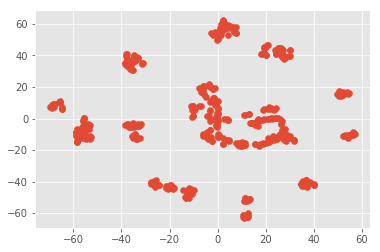

In [257]:
plot_tsne(play_tsne1)

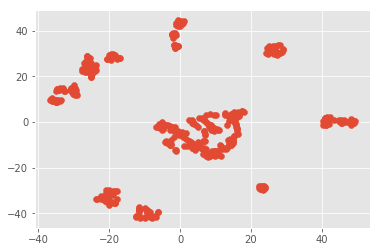

In [258]:
plot_tsne(play_tsne2)

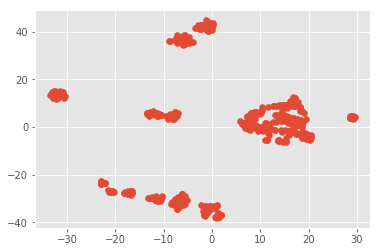

In [259]:
plot_tsne(play_tsne)

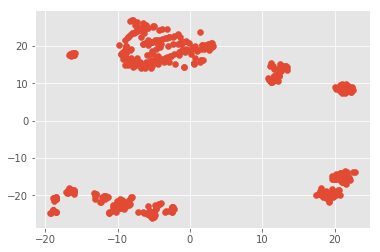

In [260]:
plot_tsne(play_tsne3)

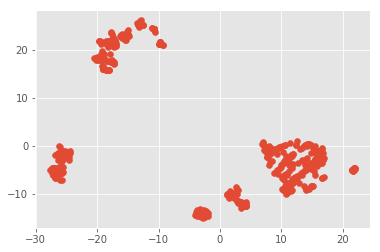

In [261]:
plot_tsne(play_tsne4)

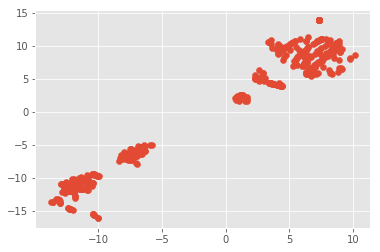

In [262]:
plot_tsne(play_tsne5)

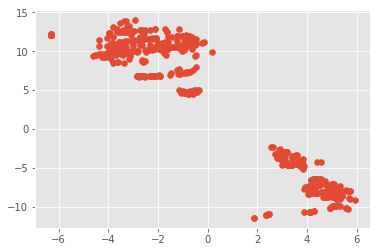

In [263]:
plot_tsne(play_tsne6)

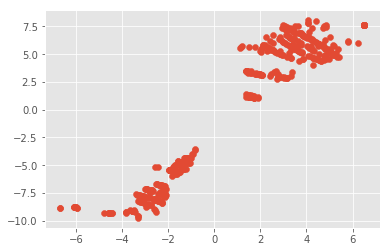

In [264]:
plot_tsne(play_tsne7)

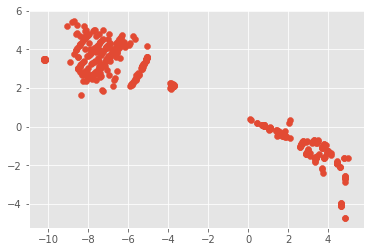

In [265]:
plot_tsne(play_tsne8)

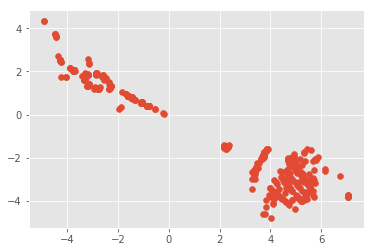

In [266]:
plot_tsne(play_tsne9)

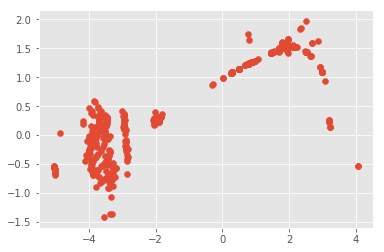

In [267]:
plot_tsne(play_tsne10)

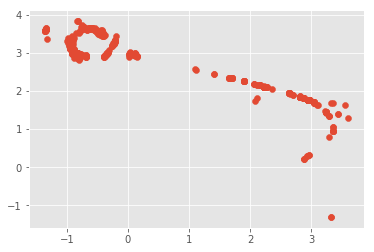

In [268]:
plot_tsne(play_tsne11)

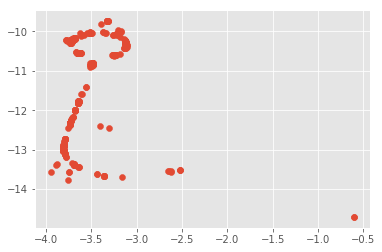

In [269]:
plot_tsne(play_tsne12)

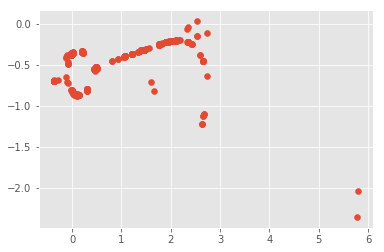

In [270]:
plot_tsne(play_tsne13)

In [271]:
# Ok, so 50-100 seems like a good perplexity

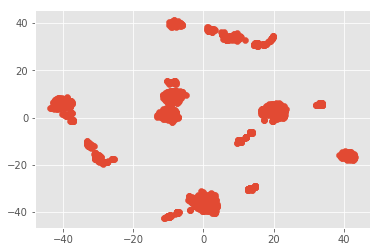

In [272]:
#  This tells me that 2500 records isn't as comprehensible at the same perplexity, so I'll need to resample

silly = data[:2500]
silly_tsne = TSNE(perplexity=100).fit_transform(silly)
plot_tsne(silly_tsne)

In [304]:
set(target)

{1, 2, 3, 4, '?'}

In [63]:
data[500:1000]

[(23, 10, 1, 40, 0, -1902),
 (45, 13, 1, 40, 1, -1902),
 (30, 9, 1, 40, 0, -1902),
 (49, 12, 0, 40, 1, -1902),
 (42, 13, 1, 80, 1, -1902),
 (43, 10, 0, 40, 1, -1902),
 (43, 10, 1, 40, 1, -1902),
 (42, 15, 1, 60, 1, -1902),
 (53, 13, 1, 55, 1, -1902),
 (40, 14, 1, 48, 1, -1902),
 (41, 13, 1, 60, 1, -1902),
 (49, 13, 1, 40, 1, -1902),
 (34, 14, 1, 50, 1, -1902),
 (50, 10, 0, 38, 1, -1902),
 (54, 9, 1, 40, 1, -1902),
 (49, 10, 1, 50, 1, -1902),
 (44, 14, 0, 60, 1, -1902),
 (57, 13, 1, 40, 1, -1902),
 (28, 14, 0, 55, 0, -1902),
 (57, 10, 1, 40, 1, -1902),
 (59, 13, 1, 43, 1, -1902),
 (38, 12, 0, 40, 1, -1902),
 (36, 9, 1, 60, 1, -1902),
 (55, 10, 1, 40, 1, -1902),
 (34, 9, 1, 60, 1, -1902),
 (51, 10, 1, 50, 1, -1902),
 (31, 13, 0, 35, 1, -1902),
 (31, 13, 0, 35, 1, -1902),
 (59, 9, 1, 52, 1, -1902),
 (48, 12, 1, 40, 1, -1902),
 (33, 13, 1, 45, 1, -1902),
 (46, 10, 1, 50, 1, -1902),
 (53, 13, 1, 40, 1, -1902),
 (39, 14, 0, 18, 1, -1902),
 (44, 9, 1, 40, 1, -1902),
 (45, 14, 1, 50, 1, -1902)

In [67]:
dat = data[500:1000]
# dat = scaler.fit_transform(dat)
# ftdata = TSNE(perplexity=10).fit_transform(dat)
# ftdatb = TSNE().fit_transform(dat)
# ftdatc = TSNE(perplexity=50).fit_transform(dat)
# ftdatd = TSNE(perplexity=75).fit_transform(dat)
# ftdate = TSNE(perplexity=100).fit_transform(dat)


In [314]:
absurd = TSNE(perplexity=5).fit_transform(dat)

In [36]:
def plotsne(tsne):
    target_nums = [1,2,3,4, "?"]
    target_ids = range(len(target_nums))
    plt.figure(figsize=(6, 5))
    colors = ['r', 'g', 'b', 'c', 'y']
    for i, c, label in zip(target_ids, colors, target_nums):
        plt.scatter(ftdat[y == i, 0], ftdat[y == i, 1], c=c, label=label)
    plt.legend()
    plt.show()

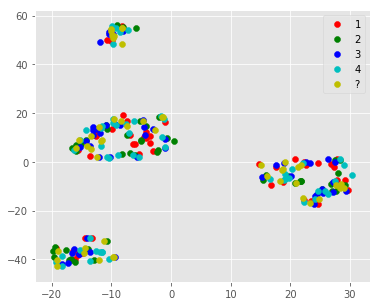

In [307]:
plotsne(ftdata)

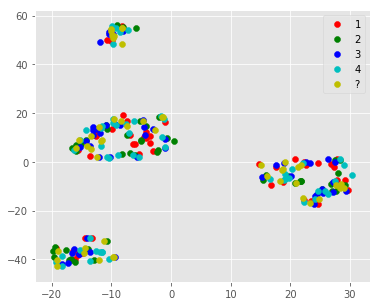

In [308]:
plotsne(ftdatb)

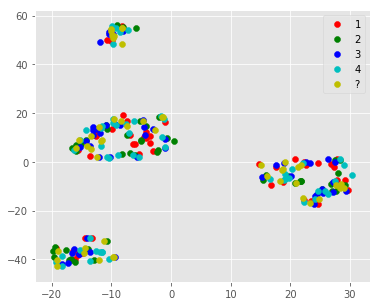

In [309]:
plotsne(ftdatc)

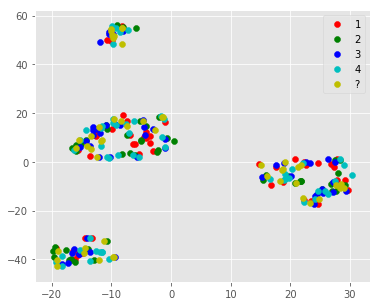

In [310]:
plotsne(ftdatd)

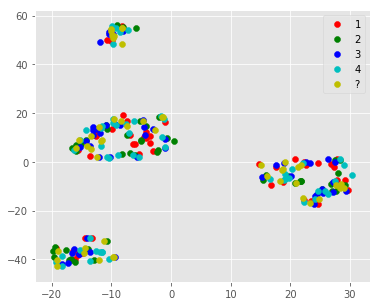

In [311]:
plotsne(ftdate)

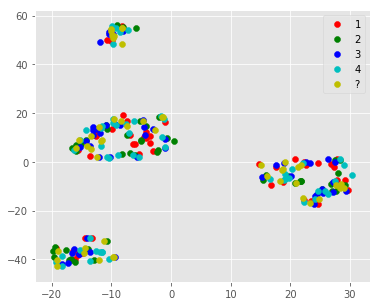

In [315]:
plotsne(absurd)

In [125]:
#  Perplexity for multiples of 10
perps = [k*10 for k in range(1,22)]

for perp in perps:
    print("PERPLEXITY = {}".format(perp))
    ftdat = TSNE(perplexity=perp).fit_transform(normalized_data)

    target_nums = ["?",1,2,3,4]
    target_ids = range(len(target_nums))
    plt.figure(figsize=(6, 5))
    colors = ['r', 'g', 'b', 'c', 'y']
    for i, c, label in zip(target_ids, colors, target_nums):
        plt.scatter(ftdat[y == i, 0], ftdat[y == i, 1], c=c, label=label)
    plt.legend()
    plt.show()

PERPLEXITY = 10


KeyboardInterrupt: 

In [ ]:
#  Perplexities for multiples of 2
perplexes = [k*2 for k in range(1, 25)]

for perp in perplexes:
    print("PERPLEXITY = {}".format(perp))
    ftdat = TSNE(perplexity=perp).fit_transform(normalized_data)

    target_nums = ["?",1,2,3,4]
    target_ids = range(len(target_nums))
    plt.figure(figsize=(6, 5))
    colors = ['r', 'g', 'b', 'c', 'y']
    for i, c, label in zip(target_ids, colors, target_nums):
        plt.scatter(ftdat[y == i, 0], ftdat[y == i, 1], c=c, label=label)
    plt.legend()
    plt.show()

PERPLEXITY = 25


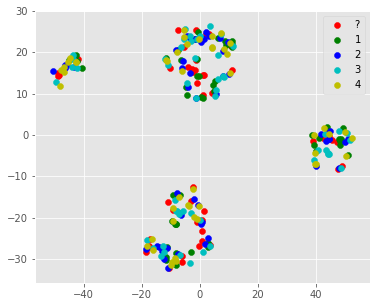

PERPLEXITY = 50


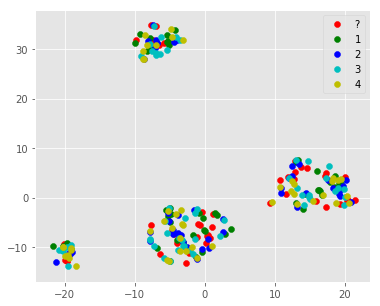

PERPLEXITY = 75


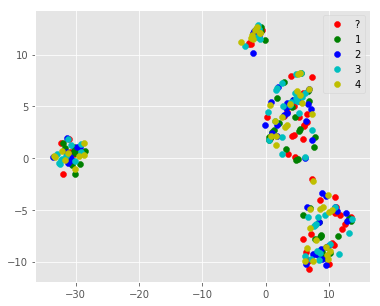

PERPLEXITY = 100


/Users/tarekbarnes/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


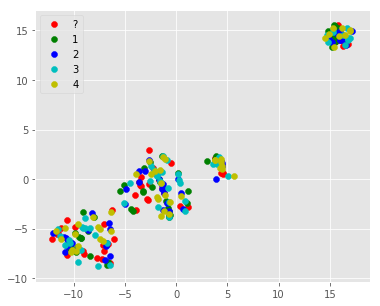

PERPLEXITY = 125


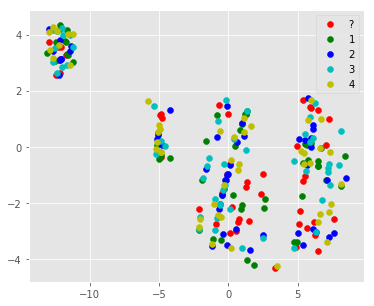

PERPLEXITY = 150


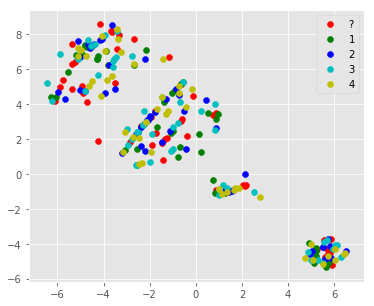

PERPLEXITY = 175


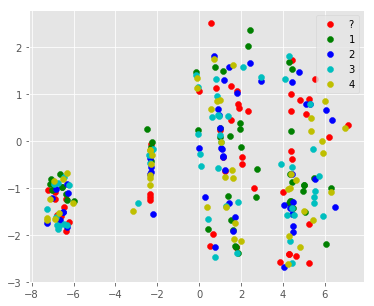

PERPLEXITY = 200


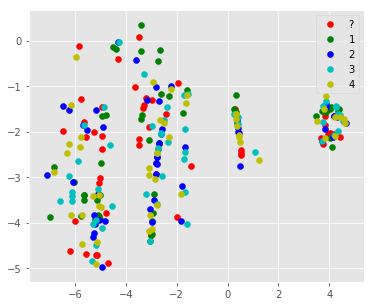

PERPLEXITY = 225


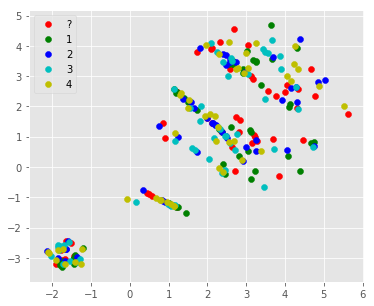

PERPLEXITY = 250


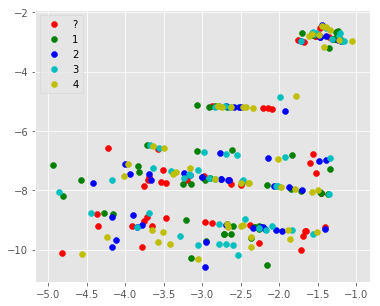

PERPLEXITY = 275


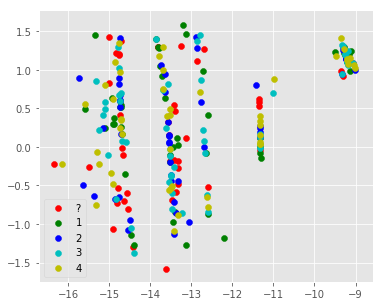

PERPLEXITY = 300


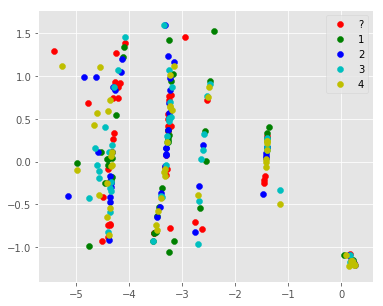

PERPLEXITY = 325


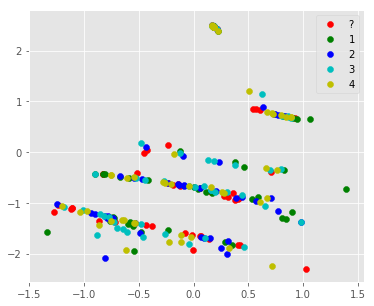

PERPLEXITY = 350


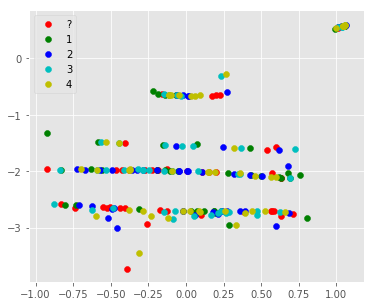

PERPLEXITY = 375


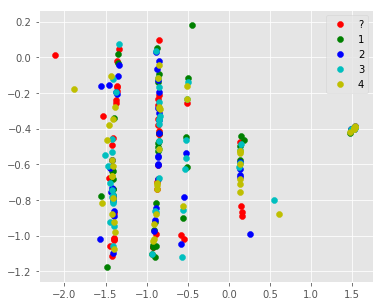

PERPLEXITY = 400


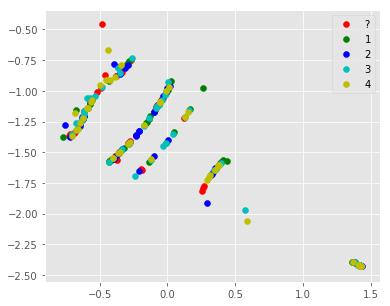

PERPLEXITY = 425


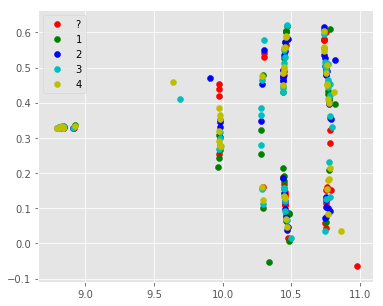

PERPLEXITY = 450


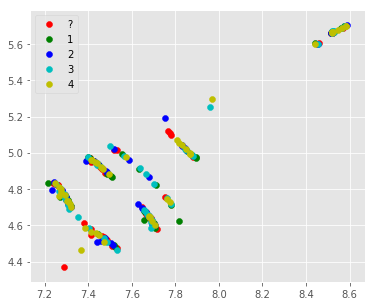

PERPLEXITY = 475


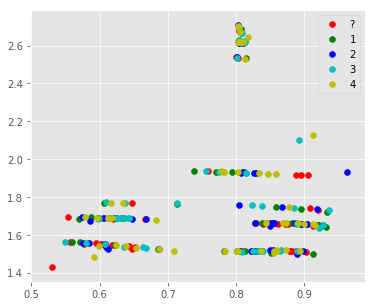

In [343]:
perplexities = [k*25 for k in range(1, 20)]

for perp in perplexities:
    print("PERPLEXITY = {}".format(perp))
    ftdat = TSNE(perplexity=perp).fit_transform(dat)

    target_nums = ["?",1,2,3,4]
    target_ids = range(len(target_nums))
    plt.figure(figsize=(6, 5))
    colors = ['r', 'g', 'b', 'c', 'y']
    for i, c, label in zip(target_ids, colors, target_nums):
        plt.scatter(ftdat[y == i, 0], ftdat[y == i, 1], c=c, label=label)
    plt.legend()
    plt.show()

In [45]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

array([20.947666, 19.59949 , 23.037676, 19.792965, 20.289259, 22.682283,
       25.024506, 23.564377, 25.106722, 26.388184, 24.272537, 26.99293 ,
       25.185492, 22.474203, 22.005808, 26.566154, 21.017252, 22.47874 ,
       23.838873, 24.046246, 25.2601  , 23.80895 , 24.247066, 26.310741,
       23.1288  , 24.409893, 19.439545, 23.260656, 20.411068, 18.85428 ,
       18.650253, 22.253632, 21.848595, 21.152704, 21.091143, 20.518593,
       20.317871, 24.317726, 23.862171, 25.362812, 22.724936, 24.177074,
       21.344553, 21.296238, 24.034115, 24.648489, 22.692019, 21.940695,
       21.988857, 26.310762, 25.458078], dtype=float32)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])